# STUDENT PERFORMANCE PREDICTION

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,f1_score, roc_auc_score, mean_squared_error, mean_absolute_percentage_error,
    roc_curve, auc
)

LOAD DATASET

In [ ]:
data = pd.DataFrame({
    'Hours_Studied': [2,4,6,8,1,5,9,7,3,10,6,5,8,7,9,4,3,10,2,1],
    'Attendance': [60,70,80,90,50,75,95,85,65,100,82,78,88,85,92,65,68,99,55,52],
    'Past_Score': [55,60,70,85,45,68,92,80,58,95,73,67,84,82,91,61,59,96,48,42],
    'Sleep_Hours': [5,6,7,8,4,6,8,7,5,9,7,6,8,7,9,5,5,9,4,4],
    'Internet_Usage': ['High','Medium','Low','Low','High','Medium','Low','Low',
                       'High','Low','Medium','High','Low','Low','Medium','High',
                       'Medium','Low','High','High'],
    'Grade': ['Average','Average','Good','Good','Poor','Average','Excellent','Good',
              'Average','Excellent','Good','Average','Good','Good','Excellent',
              'Average','Average','Excellent','Poor','Poor']
})

print("✅ Data Loaded Successfully\n")
display(data.head())

✅ Data Loaded Successfully



,Hours_Studied,Attendance,Past_Score,Sleep_Hours,Internet_Usage,Grade
0,2,60,55,5,High,Average
1,4,70,60,6,Medium,Average
2,6,80,70,7,Low,Good
3,8,90,85,8,Low,Good
4,1,50,45,4,High,Poor


DATA PREPROCESSING

In [ ]:
le_usage = LabelEncoder()
le_grade = LabelEncoder()

data['Internet_Usage'] = le_usage.fit_transform(data['Internet_Usage'])
data['Grade'] = le_grade.fit_transform(data['Grade'])

X = data.drop('Grade', axis=1)
y = data['Grade']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

EXPLORATORY DATA ANALYSIS (EDA)


📊 Basic Info & Missing Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Hours_Studied   20 non-null     int64
 1   Attendance      20 non-null     int64
 2   Past_Score      20 non-null     int64
 3   Sleep_Hours     20 non-null     int64
 4   Internet_Usage  20 non-null     int64
 5   Grade           20 non-null     int64
dtypes: int64(6)
memory usage: 1.1 KB


None


Missing Value Count:
 Hours_Studied     0
Attendance        0
Past_Score        0
Sleep_Hours       0
Internet_Usage    0
Grade             0
dtype: int64


<Figure size 500x300 with 0 Axes>

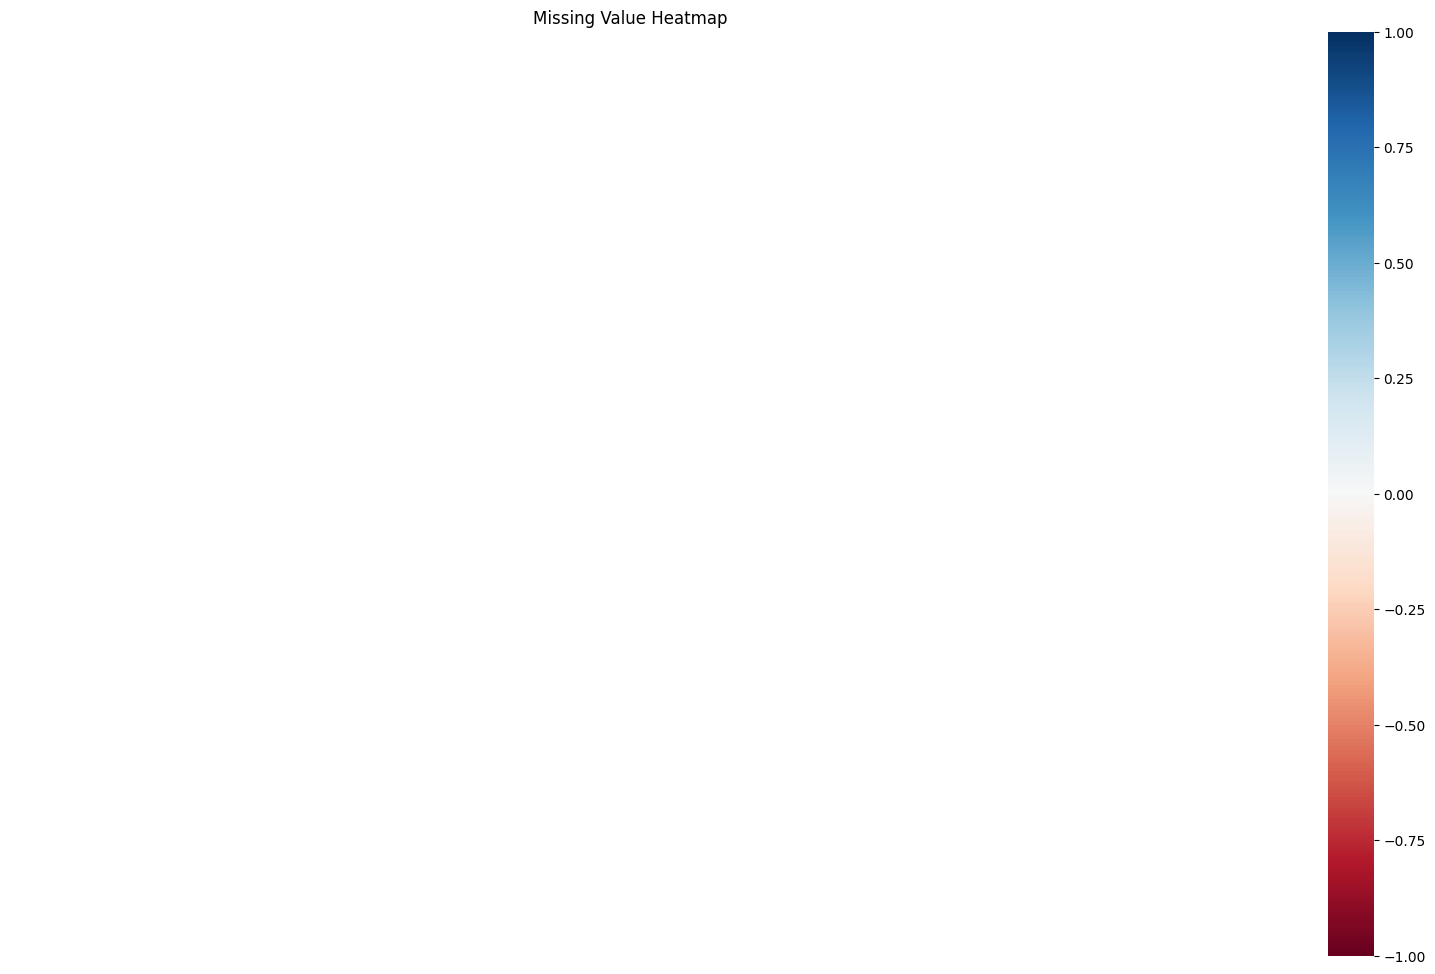

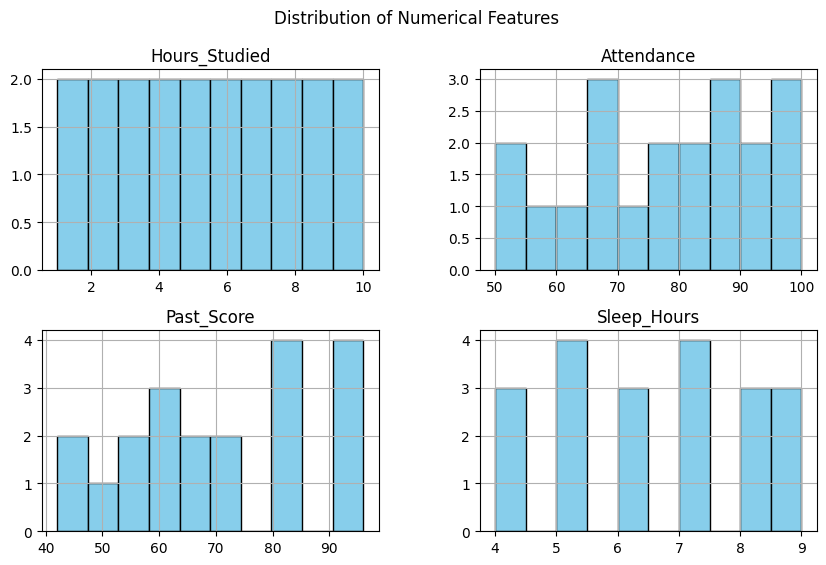

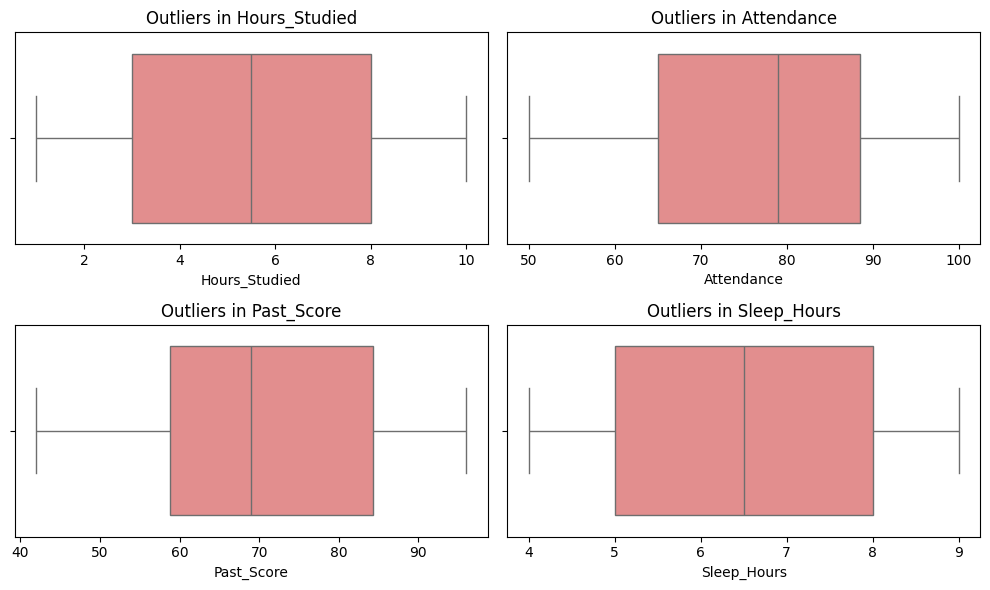

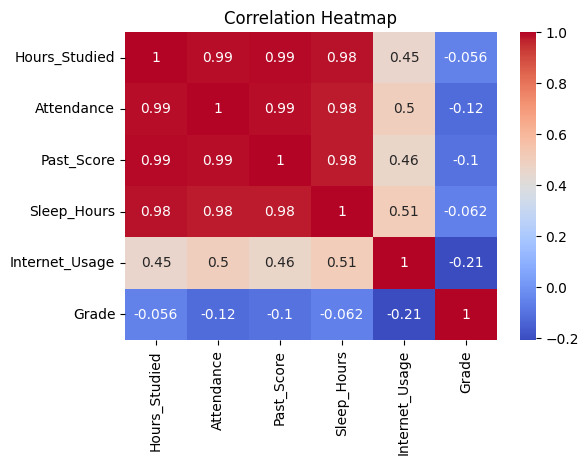

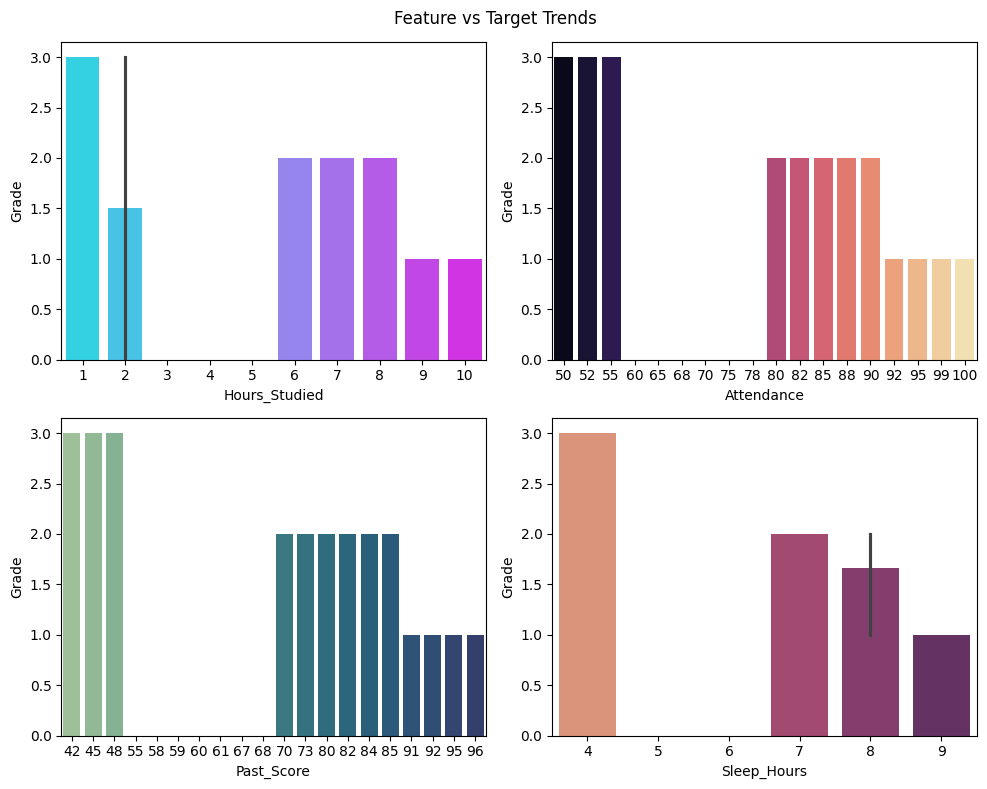

✅ EDA Completed Successfully!



In [ ]:
import missingno as msno
from scipy import stats

print("\n📊 Basic Info & Missing Values")
display(data.info())
print("\nMissing Value Count:\n", data.isnull().sum())

# 🔹 Missingness Visualization
plt.figure(figsize=(5,3))
msno.heatmap(data)
plt.title("Missing Value Heatmap")
plt.show()

# 🔹 Distribution of Numerical Features
num_cols = ['Hours_Studied','Attendance','Past_Score','Sleep_Hours']
data[num_cols].hist(bins=10, figsize=(10,6), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

# 🔹 Boxplots for Outliers
plt.figure(figsize=(10,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()

# 🔹 Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 🔹 Feature-Target Trends
fig, axes = plt.subplots(2, 2, figsize=(10,8))
sns.barplot(x='Hours_Studied', y='Grade', data=data, ax=axes[0,0], palette='cool')
sns.barplot(x='Attendance', y='Grade', data=data, ax=axes[0,1], palette='magma')
sns.barplot(x='Past_Score', y='Grade', data=data, ax=axes[1,0], palette='crest')
sns.barplot(x='Sleep_Hours', y='Grade', data=data, ax=axes[1,1], palette='flare')
fig.suptitle("Feature vs Target Trends")
plt.tight_layout()
plt.show()

print("✅ EDA Completed Successfully!\n")

MODEL BUILDING & FEATURE ENGINEERING


🔹 Logistic Regression Accuracy: 0.750
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0

    accuracy                           0.75         4
   macro avg       0.67      0.56      0.60         4
weighted avg       1.00      0.75      0.85         4


🔹 Decision Tree Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


🔹 Random Forest Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy           

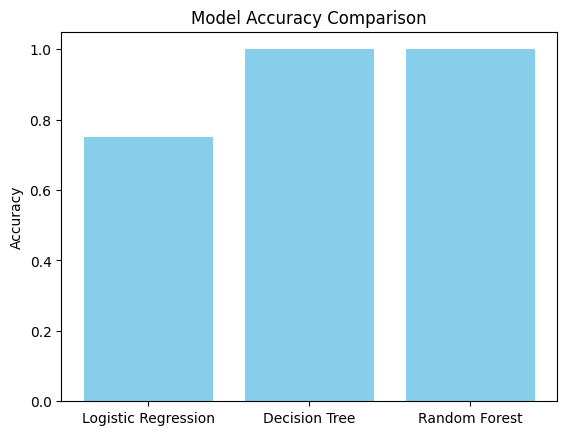

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n🔹 {name} Accuracy: {acc:.3f}")
    print(classification_report(y_test, preds))

plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

HYPERPARAMETER TUNING

In [ ]:

params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 3, 4]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=3)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("\n🏆 Best Random Forest Parameters:", grid.best_params_)


🏆 Best Random Forest Parameters: {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 100}


 EVALUATION METRICS & ERROR ANALYSIS


📈 MODEL EVALUATION METRICS
Accuracy  : 1.000
F1 Score  : 1.000
AUC Score : nan
RMSE      : 0.000
MAPE      : 0.000


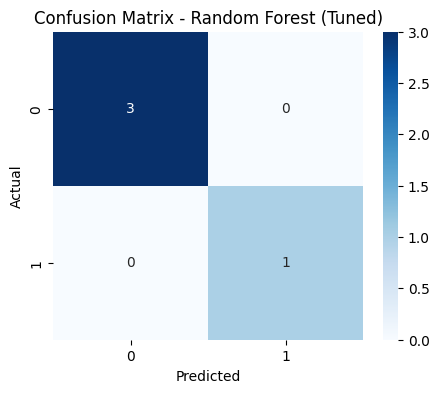

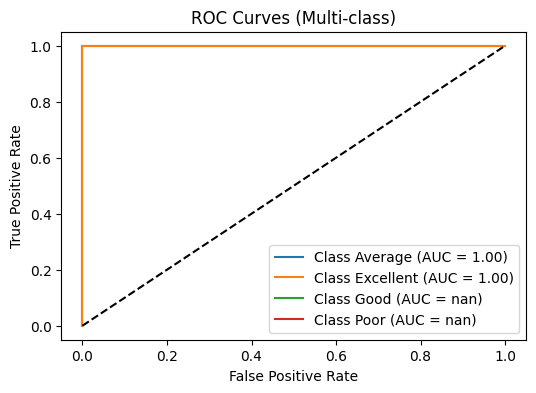


❌ Misclassified Samples Count: 0

✅ Enhanced Evaluation and Error Analysis Completed!



In [ ]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

# 🔹 Accuracy
acc = accuracy_score(y_test, y_pred)

# 🔹 F1 Score (macro for multi-class)
f1 = f1_score(y_test, y_pred, average='macro')

# 🔹 AUC Score (multi-class handled by OvR)
try:
    auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr')
except:
    auc_score = np.nan

# 🔹 RMSE & MAPE (for interpretability of prediction error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print("\n📈 MODEL EVALUATION METRICS")
print(f"Accuracy  : {acc:.3f}")
print(f"F1 Score  : {f1:.3f}")
print(f"AUC Score : {auc_score:.3f}")
print(f"RMSE      : {rmse:.3f}")
print(f"MAPE      : {mape:.3f}")

# 🔹 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# 🔹 ROC Curve for multi-class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(le_grade.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6,4))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {le_grade.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves (Multi-class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 🔹 Error Analysis — Failure Cases
errors = np.where(y_pred != y_test)[0]
print(f"\n❌ Misclassified Samples Count: {len(errors)}")

if len(errors) > 0:
    print("\n🔍 Example Misclassified Samples:")
    error_df = X_test.copy()
    error_df = pd.DataFrame(error_df, columns=X.columns)
    error_df['Actual'] = le_grade.inverse_transform(y_test.values)
    error_df['Predicted'] = le_grade.inverse_transform(y_pred)
    display(error_df.iloc[errors][:5])  # show first 5 misclassified

print("\n✅ Enhanced Evaluation and Error Analysis Completed!\n")

 INTERPRETABILITY — FEATURE IMPORTANCE

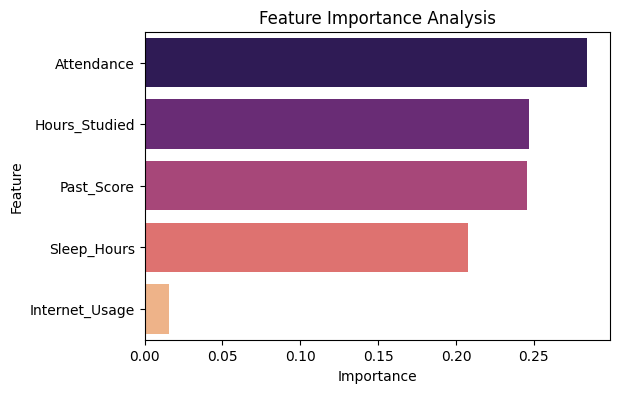

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='magma')
plt.title("Feature Importance Analysis")
plt.show()

SAMPLE PREDICTION

In [ ]:
new_student = pd.DataFrame({
    'Hours_Studied': [6],
    'Attendance': [85],
    'Past_Score': [75],
    'Sleep_Hours': [7],
    'Internet_Usage': [le_usage.transform(['Medium'])[0]]
})

scaled_input = scaler.transform(new_student)
pred_grade = best_model.predict(scaled_input)
pred_label = le_grade.inverse_transform(pred_grade)

print(f"\n🎓 Predicted Grade for new student: {pred_label[0]}")


🎓 Predicted Grade for new student: Good
